<a href="https://colab.research.google.com/github/thunderavi/cv19pred/blob/main/newcv19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Random Forest Model:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.50      0.25      0.33         4

    accuracy                           0.71        14
   macro avg       0.62      0.57      0.58        14
weighted avg       0.68      0.71      0.68        14

Confusion Matrix:
 [[9 1]
 [3 1]]
ROC-AUC Score: 0.575


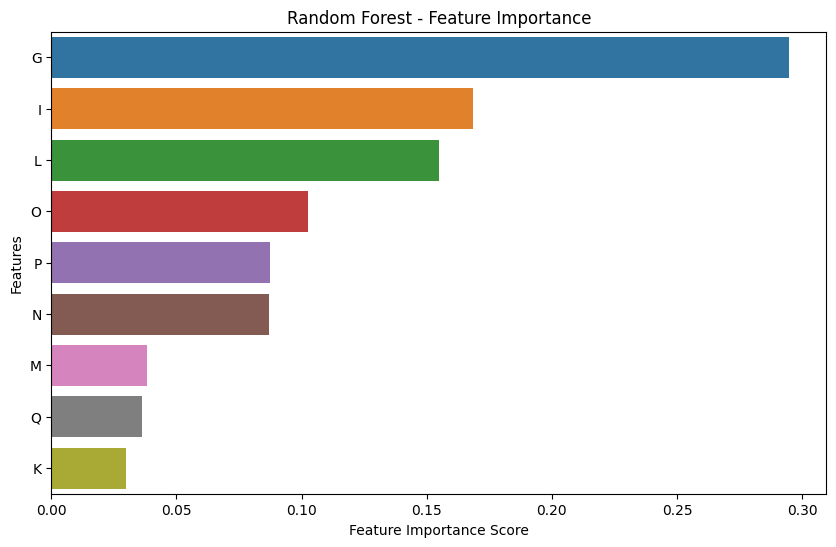

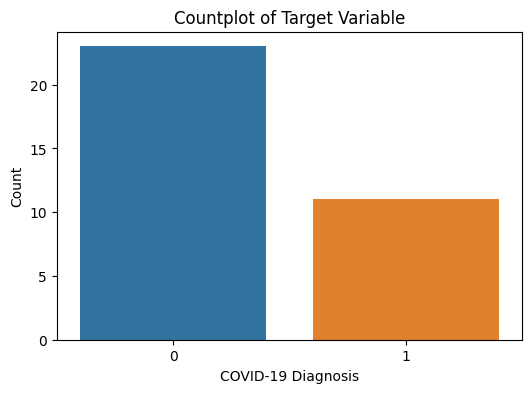

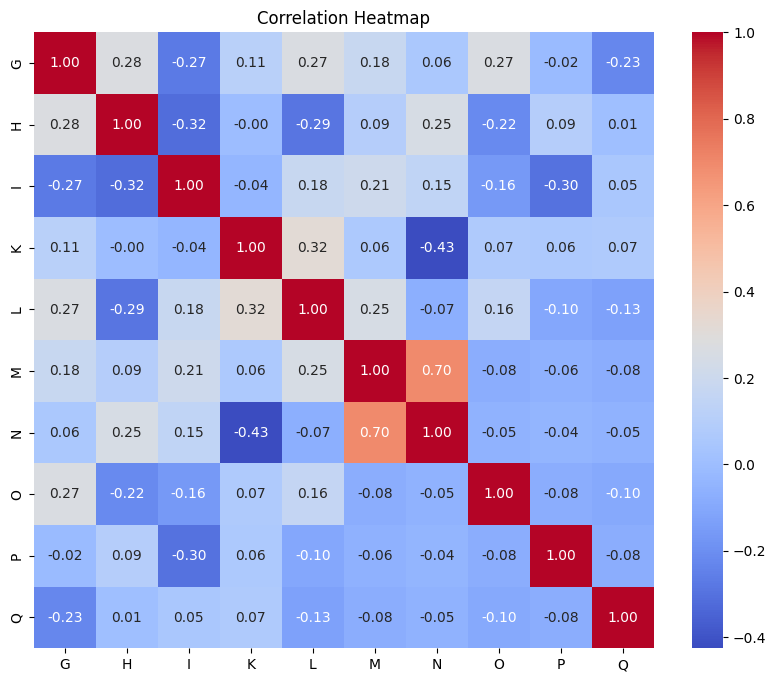

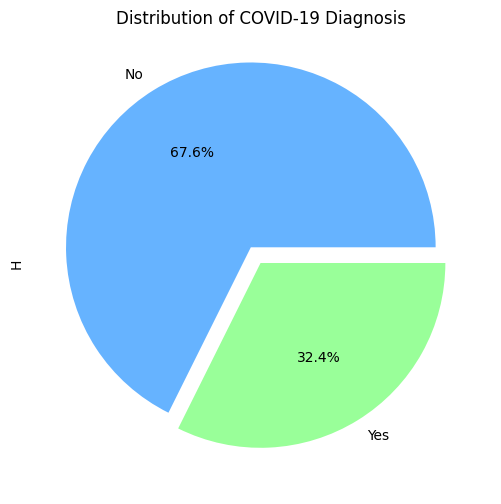

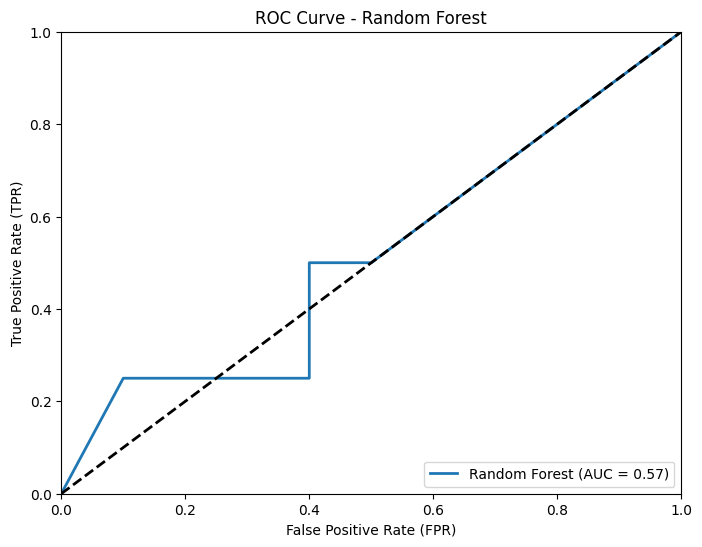


Gradient Boosting Model:
Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.50      0.57         4

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14

Confusion Matrix:
 [[9 1]
 [2 2]]
ROC-AUC Score: 0.7000000000000001


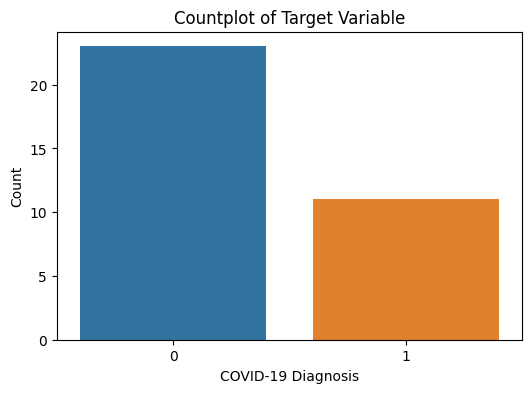

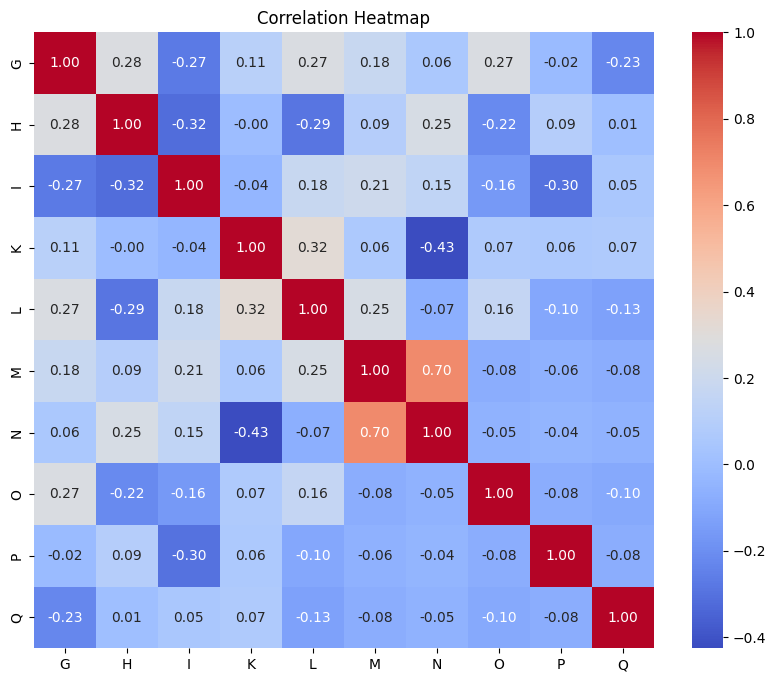

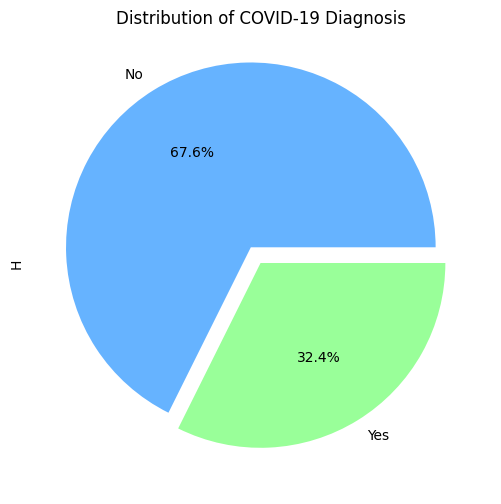

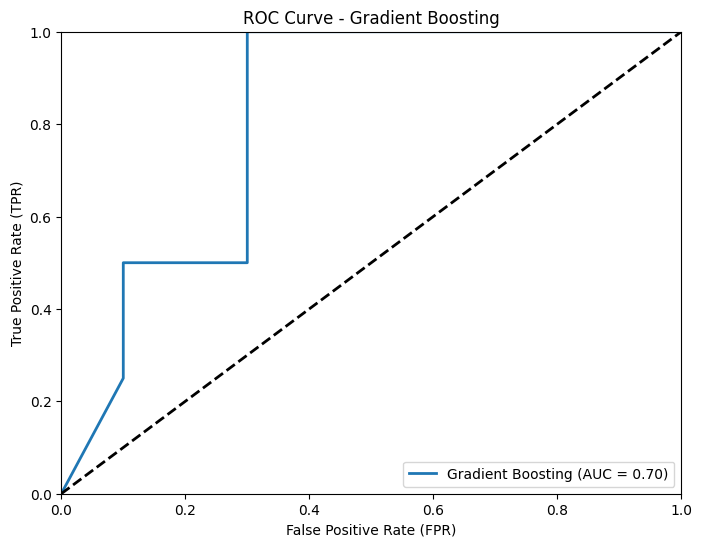


XGBoost Model:
Accuracy: 0.6428571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.40      0.50      0.44         4

    accuracy                           0.64        14
   macro avg       0.59      0.60      0.59        14
weighted avg       0.67      0.64      0.65        14

Confusion Matrix:
 [[7 3]
 [2 2]]
ROC-AUC Score: 0.5999999999999999


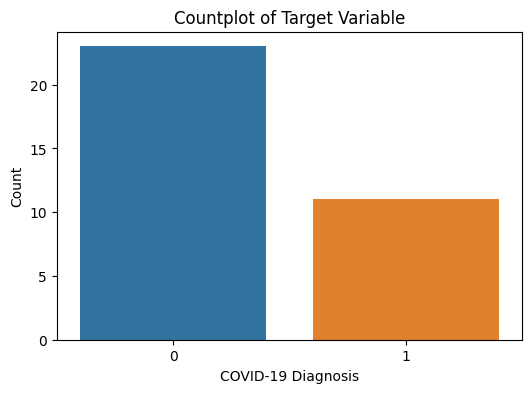

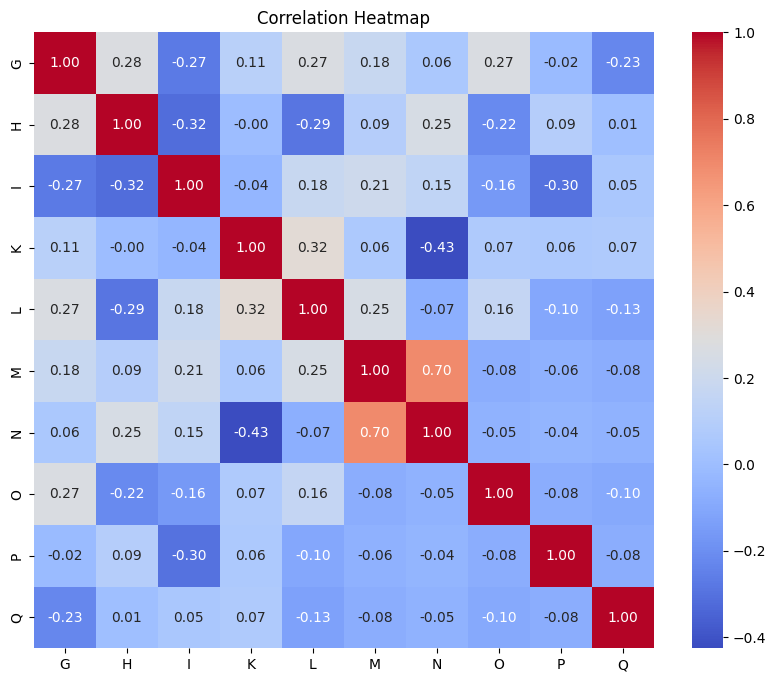

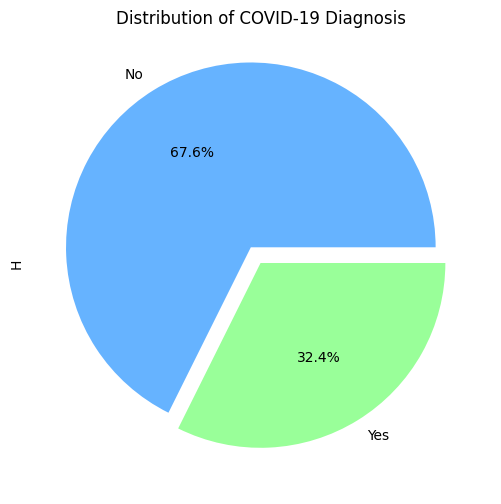

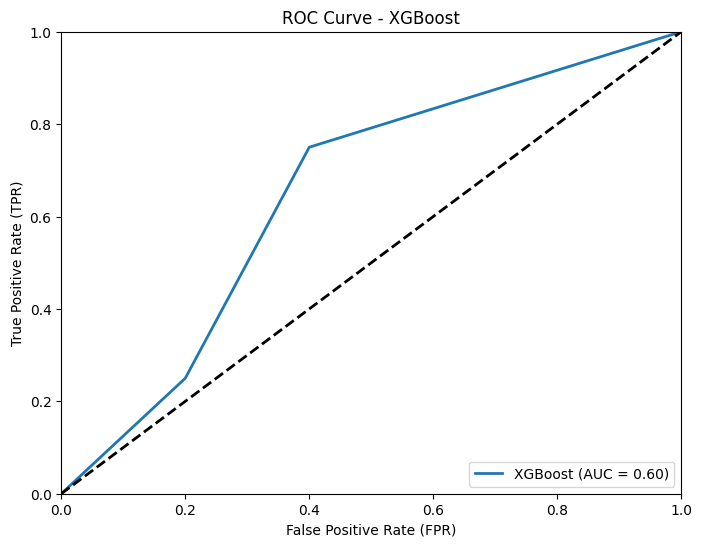

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("sa.csv")

# Drop unnecessary columns
df.drop(['A', 'B', 'C', 'D', 'E', 'F', 'J', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], axis=1, inplace=True)

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
for column in ['G', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']:
    df[column] = label_encoder.fit_transform(df[column])

# Convert 'Yes'/'No' in 'H' to 0/1
df['H'] = df['H'].map({'Yes': 1, 'No': 0})

# Define X and Y
Y = df["H"].values
X = df.drop(labels=["H"], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=30)
rf_model.fit(X_train, y_train)
rf_prediction_test = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=10, random_state=30)
gb_model.fit(X_train, y_train)
gb_prediction_test = gb_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(n_estimators=10, random_state=30)
xgb_model.fit(X_train, y_train)
xgb_prediction_test = xgb_model.predict(X_test)

# Evaluate the models
models = [('Random Forest', rf_prediction_test, rf_model),
          ('Gradient Boosting', gb_prediction_test, gb_model),
          ('XGBoost', xgb_prediction_test, xgb_model)]

for model_name, prediction_test, model in models:
    print(f"\n{model_name} Model:")
    print("Accuracy:", accuracy_score(y_test, prediction_test))
    print("Classification Report:\n", classification_report(y_test, prediction_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction_test))
    print("ROC-AUC Score:", roc_auc_score(y_test, prediction_test))

    # Plot feature importance for Random Forest
    if model_name == 'Random Forest':
        feature_list = list(X.columns)
        feature_imp_rf = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_imp_rf, y=feature_imp_rf.index)
        plt.title('Random Forest - Feature Importance')
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.show()

    # Countplot for the target variable
    plt.figure(figsize=(6, 4))
    sns.countplot(x='H', data=df)
    plt.title('Countplot of Target Variable')
    plt.xlabel('COVID-19 Diagnosis')
    plt.ylabel('Count')
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

    # Pie chart for the distribution of the target variable
    plt.figure(figsize=(6, 6))
    df['H'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], explode=(0.1, 0), labels=['No', 'Yes'])
    plt.title('Distribution of COVID-19 Diagnosis')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, prediction_test):.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
